In [1]:
from snowflake.snowpark import Session
from snowflake.snowpark.functions import avg, sum, col, cast
from snowflake.snowpark.types import IntegerType
import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def create_snowpark_session():
    
    session = Session.builder.configs(st.secrets["snowpark"]).create()
    return session

In [3]:
session = create_snowpark_session()


In [4]:
silver_price = session.table("SILVER_PRICE_ANALYTICS").to_pandas()
print(silver_price.head(3))

                 NAME          ISIN                   LEI COUNTRY SECTOR  \
0               ORPEA  FR0000184798  969500LHIH3NT7PK1V89      FR   HLTH   
1  SOPRA STERIA GROUP  FR0000050809  96950020QIOHAAK9V551      FR   TECH   
2               REXEL  FR0010451203  969500N6AVPA51648T62      FR   DSCR   

          SECTOR_LONGNAME SUBSECTOR      SUBSECTOR_LONGNAME INDUSTRY  \
0    HEALTH CARE SERVICES      HLTH    HEALTH CARE SERVICES     HCFC   
1              TECHNOLOGY      INFO  INFORMATION TECHNOLOGY     COMS   
2  CONSUMER DISCRETIONARY      CPRO        CONSUMER PRODUCT     CELC   

                      INDUSTRY_LONGNAME  ...      G         TIMESTAMP  \
0                HEALTH CARE FACILITIES  ...  53.33  1554711477744000   
1  COMPUTER SERVICES SOFTWARE & SYSTEMS  ...  56.33  1554711480376000   
2                  CONSUMER ELECTRONICS  ...  65.67  1554711482632000   

         OBNAME  PRICE  QUANTITY VOLUME                      EXTID1  \
0  FR0000184798     10        24    240  n

In [5]:
def get_x_y_entity(val, time_val):
    final_df = silver_price[silver_price['NAME'] == val].filter(['TIMESTAMP', 'PRICE'])

    final_df['TIMESTAMP'] = pd.to_datetime(final_df['TIMESTAMP']/1000, unit='ms').astype('datetime64[ms]')

    final_df =final_df.groupby('TIMESTAMP', as_index=False, sort=False)['PRICE'].mean()


    final_df = final_df.sort_values('TIMESTAMP')
    final_df['TIMESTAMP'] = pd.to_datetime(final_df['TIMESTAMP'], unit='ms').ffill()
    final_df = final_df.set_index('TIMESTAMP')
    #values = final_df.resample(time_val+'T').aggregate()
    final_df = final_df.resample(time_val+'T').mean()
    

    final_df = final_df.between_time('07:00:00', '15:00:00')
    
    final_df = final_df.reset_index()
    final_df['TIMESTAMP']=final_df['TIMESTAMP'].astype(str)
    final_df = final_df.set_index('TIMESTAMP')
                          

    xpoints = list(final_df.index)
    
    ypoints = list(final_df['PRICE'].values)

    return xpoints, ypoints


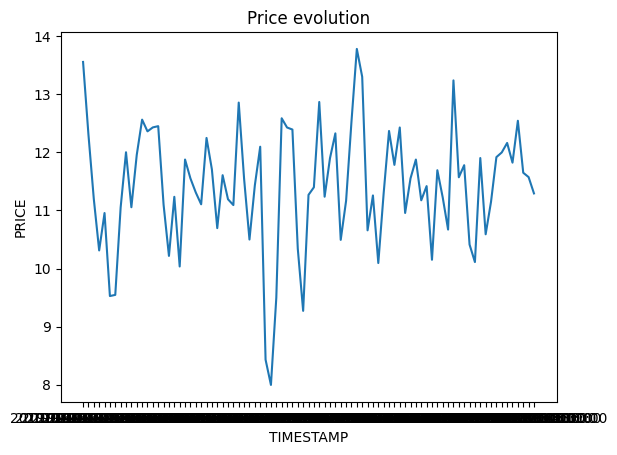

In [6]:
entity = 'AXA'
time_val ='30'
xpoints, ypoints= get_x_y_entity(entity, time_val) 


plt.plot(xpoints, ypoints)
plt.title('Price evolution')
plt.xlabel('TIMESTAMP')
plt.ylabel('PRICE')
plt.show()

